# **Description**
<br>**The Data Set**
<br>
>The data set named ‘Car Evaluation Data Set’ from UCI Machine Learning Repository is used for this lab. (You can download via https://archive.ics.uci.edu/ml/machine-learning-databases/car/ ).
This data set is composed of 1728 rows and 6 different attributes which are buying price, price of maintenance, number of doors, capacity in terms of persons to carry, the relative size of luggage boot and the estimated safety value of each car. 







**The Problem**
<br>
>A decision to buy a car or not according to its physical qualifications rather it’s based on the information provided by the data set, each car will be classified, using the six attributes, into unacceptable, acceptable, good or very good classes. 

**The Method** <br>
>A classification process by using decision tree is held as the subject of this task. Decision tree model is a supervised learning method, algorithms learn from the labels belonging to the data, and a predictive model that benefits from a number of binary rules to calculate the value of the desired variable.


In [140]:
# Load libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import matplotlib.pyplot as plt #To help plot the graph, figure and allows changes in the figure
%matplotlib inline

In [141]:
#Reading csv and checking the top 5 rows
data= pd.read_csv("car.data")
data.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [142]:
data.value_counts()

vhigh  vhigh.1  2      2.1   small  low   unacc
high   high     2      2     big    high  unacc    1
med    med      4      more  small  med   acc      1
                                    high  acc      1
                             med    med   acc      1
                                    low   unacc    1
                                                  ..
low    low      3      2     med    med   unacc    1
                                    low   unacc    1
                                    high  unacc    1
                             big    med   unacc    1
vhigh  vhigh    5more  more  small  med   unacc    1
Length: 1727, dtype: int64

In [143]:
#setting the columns name list
rename_columns=['buying price','maintenance price','doors','capacity','luggage boot size','safety value','target']

In [144]:
#renaming the columns
data.columns=rename_columns

In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   buying price       1727 non-null   object
 1   maintenance price  1727 non-null   object
 2   doors              1727 non-null   object
 3   capacity           1727 non-null   object
 4   luggage boot size  1727 non-null   object
 5   safety value       1727 non-null   object
 6   target             1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [146]:

pip install category-encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [147]:
import category_encoders as encoder

In [148]:
import category_encoders as encoders
# encode variables with ordinal encoding

encoder = encoders.OrdinalEncoder(cols=['buying price','maintenance price','doors','capacity','luggage boot size','safety value','target'])
data2=encoder.fit_transform(data)

In [149]:
#split dataset in features and target variable
feature_cols =['buying price','maintenance price','doors','capacity','luggage boot size','safety value']
X = data2[feature_cols] # Features
y = data2.target # Target variable


In [150]:
data2.head()

,buying price,maintenance price,doors,capacity,luggage boot size,safety value,target
0,1,1,1,1,1,1,1
1,1,1,1,1,1,2,1
2,1,1,1,1,2,3,1
3,1,1,1,1,2,1,1
4,1,1,1,1,2,2,1


In [151]:
y

0       1
1       1
2       1
3       1
4       1
       ..
1722    4
1723    3
1724    1
1725    4
1726    3
Name: target, Length: 1727, dtype: int64

In [152]:
X

,buying price,maintenance price,doors,capacity,luggage boot size,safety value
0,1,1,1,1,1,1
1,1,1,1,1,1,2
2,1,1,1,1,2,3
3,1,1,1,1,2,1
4,1,1,1,1,2,2
...,...,...,...,...,...,...
1722,4,4,4,3,2,1
1723,4,4,4,3,2,2
1724,4,4,4,3,3,3
1725,4,4,4,3,3,1


In [153]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1) # 60% training and 40% test


# Original Tree

>Fiting, Predicting and Evaluating Original Tree on Test and Train Data

In [154]:
cls = DecisionTreeClassifier(criterion="entropy", random_state=1)
cls.fit(X_train,y_train)
val_predictions = cls.predict(X_test)

In [155]:
print("Accuracy Score Of Original Tree On Test Data:",metrics.accuracy_score(y_test, val_predictions))

Accuracy Score Of Original Tree On Test Data: 0.9623733719247467


In [156]:
val_predictions2= cls.predict(X_train)
print("Accuracy Score Of Original Tree On Train Data:",metrics.accuracy_score(y_train, val_predictions2))

Accuracy Score Of Original Tree On Train Data: 1.0


[Text(0.36380597014925375, 0.9583333333333334, 'X[5] <= 2.5\nentropy = 1.176\nsamples = 1036\nvalue = [732, 231, 33, 40]'),
 Text(0.34888059701492535, 0.875, 'X[3] <= 1.5\nentropy = 1.457\nsamples = 677\nvalue = [373, 231, 33, 40]'),
 Text(0.333955223880597, 0.7916666666666666, 'entropy = 0.0\nsamples = 224\nvalue = [224, 0, 0, 0]'),
 Text(0.36380597014925375, 0.7916666666666666, 'X[0] <= 2.5\nentropy = 1.608\nsamples = 453\nvalue = [149, 231, 33, 40]'),
 Text(0.12686567164179105, 0.7083333333333334, 'X[1] <= 1.5\nentropy = 0.995\nsamples = 231\nvalue = [125, 106, 0, 0]'),
 Text(0.11194029850746269, 0.625, 'entropy = 0.0\nsamples = 55\nvalue = [55, 0, 0, 0]'),
 Text(0.1417910447761194, 0.625, 'X[4] <= 1.5\nentropy = 0.97\nsamples = 176\nvalue = [70, 106, 0, 0]'),
 Text(0.07462686567164178, 0.5416666666666666, 'X[5] <= 1.5\nentropy = 0.913\nsamples = 64\nvalue = [43, 21, 0, 0]'),
 Text(0.05970149253731343, 0.4583333333333333, 'entropy = 0.0\nsamples = 34\nvalue = [34, 0, 0, 0]'),
 Text(

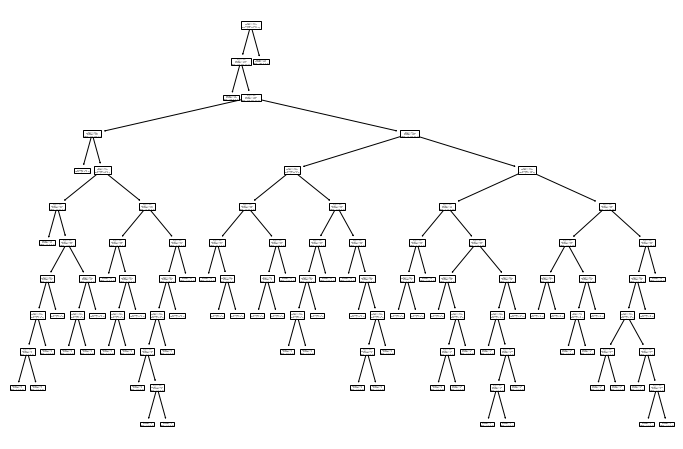

In [157]:
#making decision tree
from sklearn import tree
plt.figure(figsize=(12,8))
tree.plot_tree(cls) 

In [158]:
from sklearn.tree import export_graphviz
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(cls, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("Original_decision_tree") 

'Original_decision_tree.pdf'

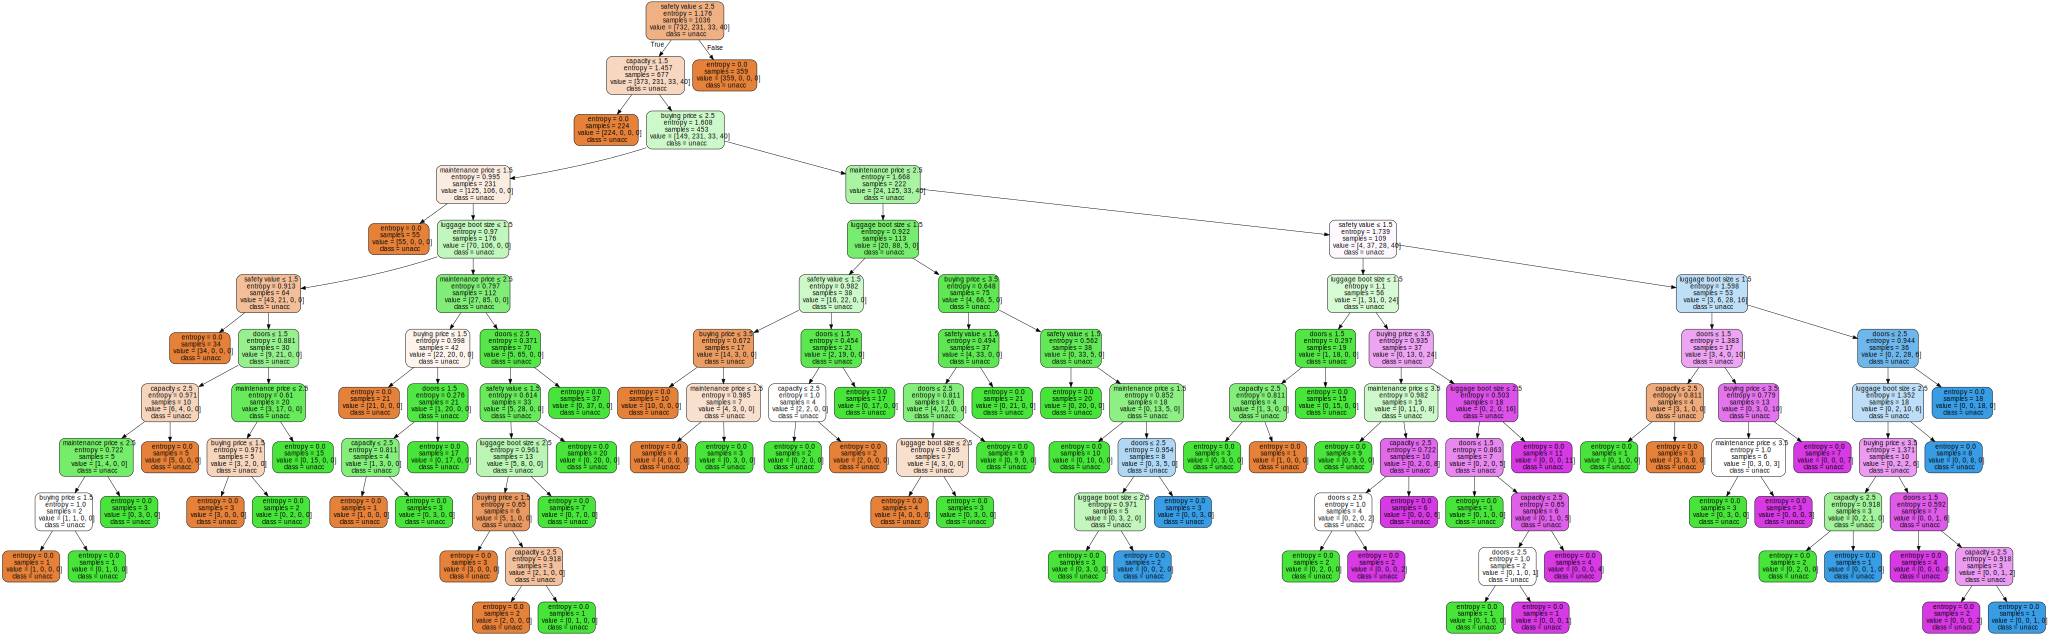

In [159]:
dot_data = tree.export_graphviz(cls, out_file=None, 
                      feature_names=feature_cols,  
                      class_names=data.target,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [160]:
help(cls.tree_)

Help on Tree object:

class Tree(builtins.object)
 |  Array-based representation of a binary decision tree.
 |  
 |  The binary tree is represented as a number of parallel arrays. The i-th
 |  element of each array holds information about the node `i`. Node 0 is the
 |  tree's root. You can find a detailed description of all arrays in
 |  `_tree.pxd`. NOTE: Some of the arrays only apply to either leaves or split
 |  nodes, resp. In this case the values of nodes of the other type are
 |  arbitrary!
 |  
 |  Attributes
 |  ----------
 |  node_count : int
 |      The number of nodes (internal nodes + leaves) in the tree.
 |  
 |  capacity : int
 |      The current capacity (i.e., size) of the arrays, which is at least as
 |      great as `node_count`.
 |  
 |  max_depth : int
 |      The depth of the tree, i.e. the maximum depth of its leaves.
 |  
 |  children_left : array of int, shape [node_count]
 |      children_left[i] holds the node id of the left child of node i.
 |      For leave

> Finding the number of nodes and maximum depth of Tree

In [161]:
print("The Maximum depth of Original Tree is: ",  cls.tree_.max_depth)

The Maximum depth of Original Tree is:  11


In [162]:
print("The Total number of nodes of Original tree is: ",cls.tree_.node_count)

The Total number of nodes of Original tree is:  119


# **Pre-Pruning Tree Using max_depth parameter**

**Trying with an example of max_depth=10**
<br>Plotting the tree with the said max_depth




> Fiting, Predicting and Evaluating Pre-Prune Tree on Test and Train Data

In [163]:
pre_prune = DecisionTreeClassifier(criterion="entropy", random_state=1, max_depth=10)
pre_prune.fit(X_train,y_train)
val_predictions_pre_prune = pre_prune.predict(X_test)
print("Accuracy Score Of Pre-Prune Tree (max_depth=10) On Test Data:",metrics.accuracy_score(y_test, val_predictions_pre_prune))
val_predictions_pre_prune2= pre_prune.predict(X_train)
print("Accuracy Score Of Pre-Prune Tree (max_depth=10) On Train Data:",metrics.accuracy_score(y_train, val_predictions_pre_prune2))


Accuracy Score Of Pre-Prune Tree (max_depth=10) On Test Data: 0.9580318379160637
Accuracy Score Of Pre-Prune Tree (max_depth=10) On Train Data: 0.997104247104247


[Text(0.3693181818181818, 0.9545454545454546, 'X[5] <= 2.5\nentropy = 1.176\nsamples = 1036\nvalue = [732, 231, 33, 40]'),
 Text(0.3541666666666667, 0.8636363636363636, 'X[3] <= 1.5\nentropy = 1.457\nsamples = 677\nvalue = [373, 231, 33, 40]'),
 Text(0.3390151515151515, 0.7727272727272727, 'entropy = 0.0\nsamples = 224\nvalue = [224, 0, 0, 0]'),
 Text(0.3693181818181818, 0.7727272727272727, 'X[0] <= 2.5\nentropy = 1.608\nsamples = 453\nvalue = [149, 231, 33, 40]'),
 Text(0.12878787878787878, 0.6818181818181818, 'X[1] <= 1.5\nentropy = 0.995\nsamples = 231\nvalue = [125, 106, 0, 0]'),
 Text(0.11363636363636363, 0.5909090909090909, 'entropy = 0.0\nsamples = 55\nvalue = [55, 0, 0, 0]'),
 Text(0.14393939393939395, 0.5909090909090909, 'X[4] <= 1.5\nentropy = 0.97\nsamples = 176\nvalue = [70, 106, 0, 0]'),
 Text(0.07575757575757576, 0.5, 'X[5] <= 1.5\nentropy = 0.913\nsamples = 64\nvalue = [43, 21, 0, 0]'),
 Text(0.06060606060606061, 0.4090909090909091, 'entropy = 0.0\nsamples = 34\nvalue = 

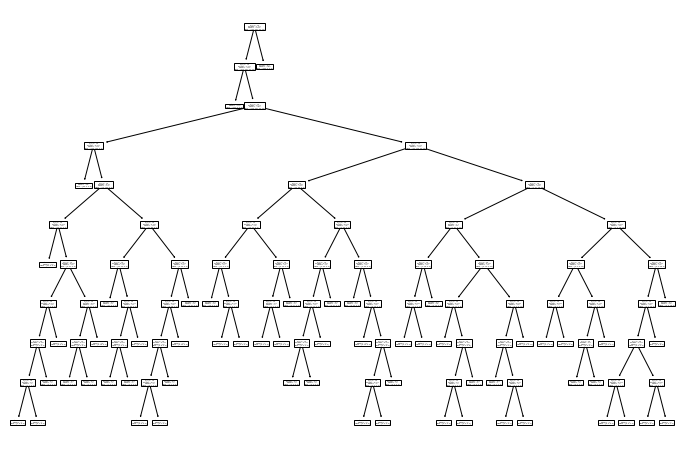

In [164]:
plt.figure(figsize=(12,8))
tree.plot_tree(pre_prune) 

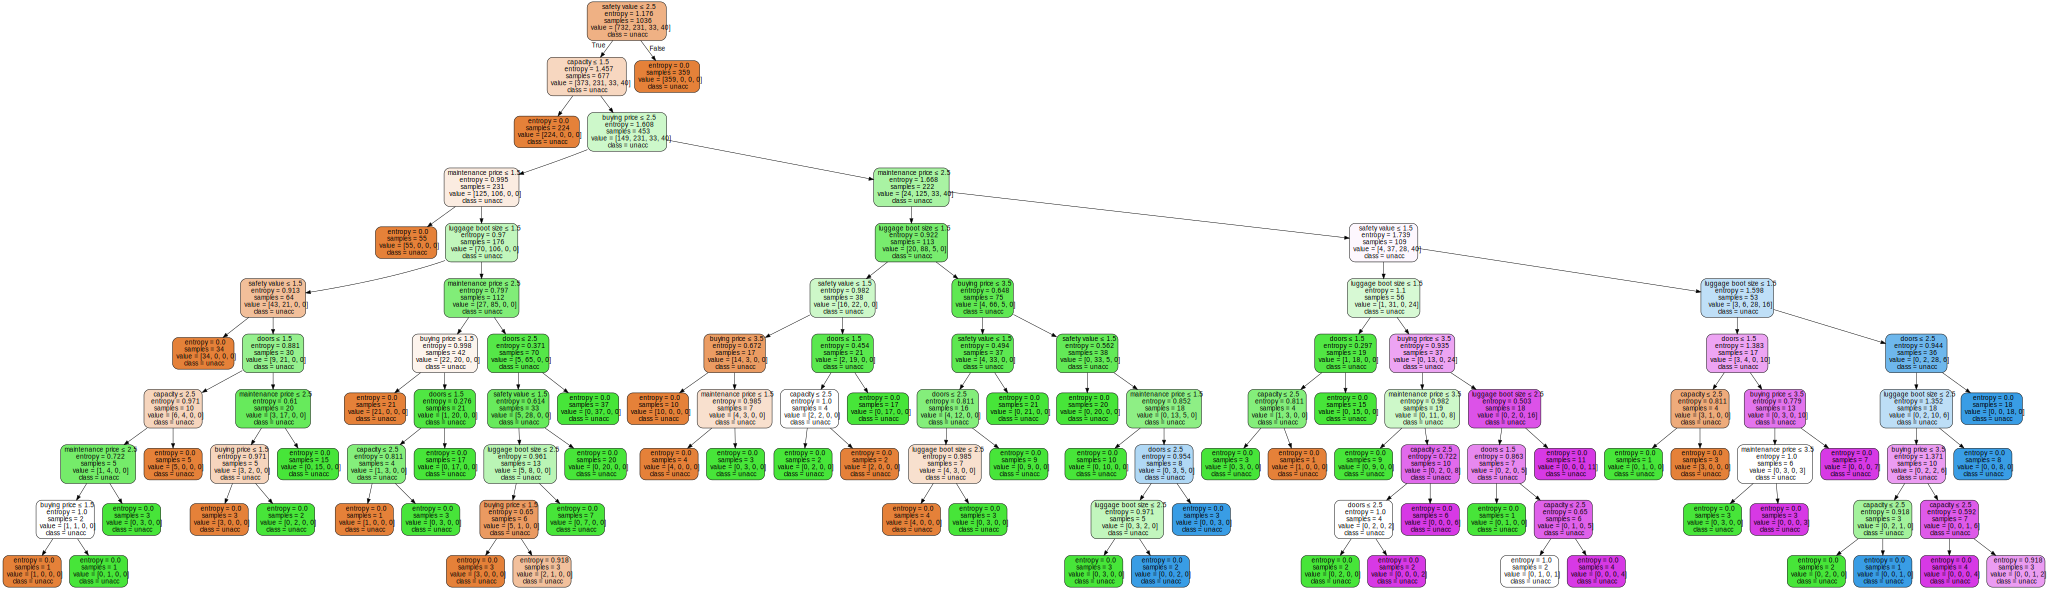

In [165]:
dot_data2 = tree.export_graphviz(pre_prune, out_file=None) 
graph = graphviz.Source(dot_data2) 
graph.render("Pre-Prune_decision_tree") 
dot_data2 = tree.export_graphviz(pre_prune, out_file=None, 
                      feature_names=feature_cols,  
                      class_names=data.target,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data2)  
graph

In [166]:
print("The Total number of nodes in the above pre-prune tree is: ",pre_prune.tree_.node_count)

The Total number of nodes in the above pre-prune tree is:  113


In [167]:
print("The maximum depth of the above pre-prune tree is: ",pre_prune.tree_.max_depth)

The maximum depth of the above pre-prune tree is:  10


>Creating list for different max_depths

In [168]:
max_depths = [i for i in range(1, 12)]
max_depths

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

> Fiting, Predicting and Evaluating Pre-Prune Tree on Test and Train Data on different max_depths

In [169]:
train_scores=list()
test_scores=list()
# evaluate a decision tree for each depth
for i in max_depths:
 # configure the model
 pre_prune_model = DecisionTreeClassifier(max_depth=i)
 # fit model on the training dataset
 pre_prune_model.fit(X_train, y_train)
 # evaluate on the train dataset
 train_predic = pre_prune_model.predict(X_train)
 train_acc = metrics.accuracy_score(y_train, train_predic)
 train_scores.append(train_acc)
 # evaluate on the test dataset
 test_predic = pre_prune_model.predict(X_test)
 test_acc =metrics.accuracy_score(y_test, test_predic)
 test_scores.append(test_acc)
 # summarize progress
 print('> Depth %d, Train Accuracy: %.3f, Test Accuracy: %.3f' % (i, train_acc, test_acc))
 print('\t The number of Nodes in '+str(i)+' depth tree: ', pre_prune_model.tree_.node_count)

> Depth 1, Train Accuracy: 0.707, Test Accuracy: 0.690
	 The number of Nodes in 1 depth tree:  3
> Depth 2, Train Accuracy: 0.786, Test Accuracy: 0.766
	 The number of Nodes in 2 depth tree:  5
> Depth 3, Train Accuracy: 0.804, Test Accuracy: 0.773
	 The number of Nodes in 3 depth tree:  7
> Depth 4, Train Accuracy: 0.857, Test Accuracy: 0.841
	 The number of Nodes in 4 depth tree:  11
> Depth 5, Train Accuracy: 0.883, Test Accuracy: 0.865
	 The number of Nodes in 5 depth tree:  19
> Depth 6, Train Accuracy: 0.943, Test Accuracy: 0.922
	 The number of Nodes in 6 depth tree:  33
> Depth 7, Train Accuracy: 0.953, Test Accuracy: 0.920
	 The number of Nodes in 7 depth tree:  55
> Depth 8, Train Accuracy: 0.981, Test Accuracy: 0.962
	 The number of Nodes in 8 depth tree:  85
> Depth 9, Train Accuracy: 0.990, Test Accuracy: 0.954
	 The number of Nodes in 9 depth tree:  103
> Depth 10, Train Accuracy: 0.998, Test Accuracy: 0.949
	 The number of Nodes in 10 depth tree:  119
> Depth 11, Train A

> plotting the test and train score for different maximum depths in max_depths list

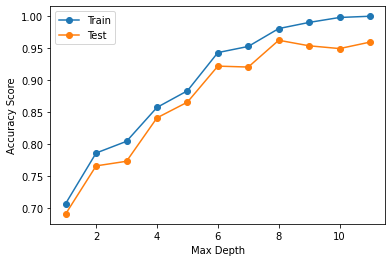

In [170]:
from matplotlib import pyplot
# plot of train and test scores vs tree depth
pyplot.plot(max_depths, train_scores, '-o', label='Train')
pyplot.plot(max_depths, test_scores, '-o', label='Test')
pyplot.legend()
plt.xlabel("Max Depth")
plt.ylabel("Accuracy Score")
pyplot.show()

# Post-Pruning Tree Using ccp_alpha parameter 

**Trying with an example of ccp_alpha=0.02**
<br>Plotting the tree with the said ccp_alpha

>Fiting, Predicting and Evaluating Post-Prune Tree on Test and Train Data

In [171]:
post_prune = DecisionTreeClassifier(criterion="entropy", random_state=1, ccp_alpha=0.020)
post_prune.fit(X_train,y_train)
val_predictions_post_prune = post_prune.predict(X_test)
print("Accuracy Score Of Post-Prune Tree (ccp_alpha= 0.02) On Test Data:",metrics.accuracy_score(y_test, val_predictions_post_prune))
val_predictions_post_prune2= pre_prune.predict(X_train)
print("Accuracy Score Of Post-Prune Tree (ccp_alpha= 0.02) On Train Data:",metrics.accuracy_score(y_train, val_predictions_post_prune2))

Accuracy Score Of Post-Prune Tree (ccp_alpha= 0.02) On Test Data: 0.91027496382055
Accuracy Score Of Post-Prune Tree (ccp_alpha= 0.02) On Train Data: 0.997104247104247


[Text(0.4375, 0.9375, 'X[5] <= 2.5\nentropy = 1.176\nsamples = 1036\nvalue = [732, 231, 33, 40]'),
 Text(0.375, 0.8125, 'X[3] <= 1.5\nentropy = 1.457\nsamples = 677\nvalue = [373, 231, 33, 40]'),
 Text(0.3125, 0.6875, 'entropy = 0.0\nsamples = 224\nvalue = [224, 0, 0, 0]'),
 Text(0.4375, 0.6875, 'X[0] <= 2.5\nentropy = 1.608\nsamples = 453\nvalue = [149, 231, 33, 40]'),
 Text(0.1875, 0.5625, 'X[1] <= 1.5\nentropy = 0.995\nsamples = 231\nvalue = [125, 106, 0, 0]'),
 Text(0.125, 0.4375, 'entropy = 0.0\nsamples = 55\nvalue = [55, 0, 0, 0]'),
 Text(0.25, 0.4375, 'X[4] <= 1.5\nentropy = 0.97\nsamples = 176\nvalue = [70, 106, 0, 0]'),
 Text(0.125, 0.3125, 'X[5] <= 1.5\nentropy = 0.913\nsamples = 64\nvalue = [43, 21, 0, 0]'),
 Text(0.0625, 0.1875, 'entropy = 0.0\nsamples = 34\nvalue = [34, 0, 0, 0]'),
 Text(0.1875, 0.1875, 'entropy = 0.881\nsamples = 30\nvalue = [9, 21, 0, 0]'),
 Text(0.375, 0.3125, 'X[1] <= 2.5\nentropy = 0.797\nsamples = 112\nvalue = [27, 85, 0, 0]'),
 Text(0.3125, 0.1875, 

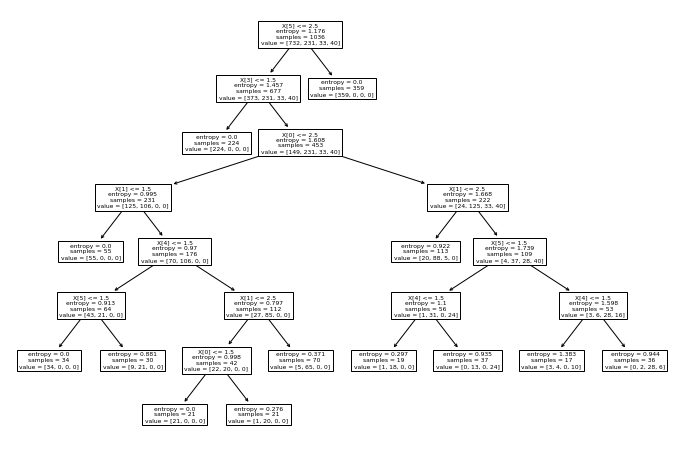

In [172]:
plt.figure(figsize=(12,8))
tree.plot_tree(post_prune) 

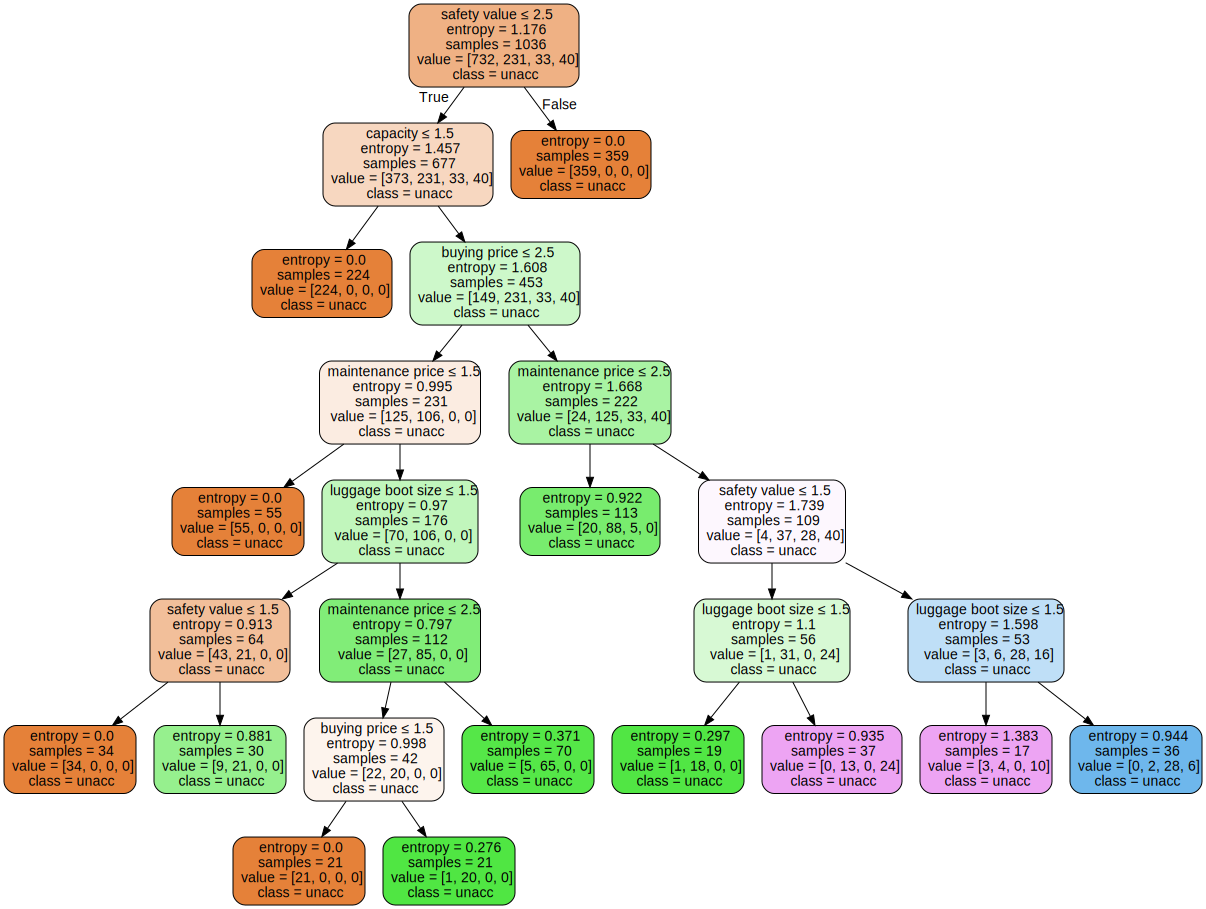

In [173]:
dot_data3 = tree.export_graphviz(post_prune, out_file=None) 
graph = graphviz.Source(dot_data3) 
graph.render("Post-Prune_decision_tree") 
dot_data3 = tree.export_graphviz(post_prune, out_file=None, 
                      feature_names=feature_cols,  
                      class_names=data.target,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data3)  
graph

In [174]:
print("The Total number of nodes in the above post-prune tree is: ",post_prune.tree_.node_count)

The Total number of nodes in the above post-prune tree is:  25


In [175]:
print("The maximum depth of the above post-prune tree is: ",post_prune.tree_.max_depth)

The maximum depth of the above post-prune tree is:  7


>Finding right parameter of alpha using cost complexity pruning.

In [176]:
clf = DecisionTreeClassifier(criterion="entropy", random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.         0.0017421  0.0018823  0.0018823  0.00199889 0.00206729
 0.00265916 0.00272779 0.00279928 0.00291197 0.00313235 0.00348421
 0.00368507 0.003861   0.00468605 0.00488974 0.00533595 0.00551593
 0.00578325 0.00588313 0.00657617 0.00661734 0.00710622 0.00867797
 0.00884509 0.00978382 0.00979348 0.01578832 0.01763179 0.02059436
 0.0262499  0.0271297  0.04169631 0.05716297 0.07389456 0.12365406
 0.23677213]


>Making different models each having different alpha values

In [177]:
# For each alpha, append model to a list of models
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

print(clfs)

[DecisionTreeClassifier(random_state=1), DecisionTreeClassifier(ccp_alpha=0.001742104476079542, random_state=1), DecisionTreeClassifier(ccp_alpha=0.0018823043097925313, random_state=1), DecisionTreeClassifier(ccp_alpha=0.0018823043097925313, random_state=1), DecisionTreeClassifier(ccp_alpha=0.0019988945222375928, random_state=1), DecisionTreeClassifier(ccp_alpha=0.002067287113973256, random_state=1), DecisionTreeClassifier(ccp_alpha=0.002659157820621109, random_state=1), DecisionTreeClassifier(ccp_alpha=0.002727786066344838, random_state=1), DecisionTreeClassifier(ccp_alpha=0.0027992779829183016, random_state=1), DecisionTreeClassifier(ccp_alpha=0.0029119749478718204, random_state=1), DecisionTreeClassifier(ccp_alpha=0.0031323479708846827, random_state=1), DecisionTreeClassifier(ccp_alpha=0.003484208952159084, random_state=1), DecisionTreeClassifier(ccp_alpha=0.00368507337036666, random_state=1), DecisionTreeClassifier(ccp_alpha=0.003861003861003861, random_state=1), DecisionTreeClassi

plotting the test and train score for different alphas.

In [178]:
train_acc = list()
test_acc = list()
index=0
for model in clfs:
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_acc.append(metrics.accuracy_score(y_train_pred,y_train))
    test_acc.append(metrics.accuracy_score(y_test_pred,y_test))
    print('> Max Depth '+str(model.tree_.max_depth)+', Train Accuracy: %.3f, Test Accuracy: %.3f, Nodes Count: %d' % (train_acc[index], test_acc[index],model.tree_.node_count))
    
    index=index+1


> Max Depth 11, Train Accuracy: 1.000, Test Accuracy: 0.964, Nodes Count: 125
> Max Depth 9, Train Accuracy: 0.982, Test Accuracy: 0.948, Nodes Count: 67
> Max Depth 9, Train Accuracy: 0.980, Test Accuracy: 0.945, Nodes Count: 63
> Max Depth 9, Train Accuracy: 0.980, Test Accuracy: 0.945, Nodes Count: 63
> Max Depth 9, Train Accuracy: 0.980, Test Accuracy: 0.945, Nodes Count: 63
> Max Depth 9, Train Accuracy: 0.980, Test Accuracy: 0.945, Nodes Count: 63
> Max Depth 8, Train Accuracy: 0.968, Test Accuracy: 0.933, Nodes Count: 47
> Max Depth 8, Train Accuracy: 0.968, Test Accuracy: 0.933, Nodes Count: 47
> Max Depth 8, Train Accuracy: 0.968, Test Accuracy: 0.933, Nodes Count: 47
> Max Depth 8, Train Accuracy: 0.968, Test Accuracy: 0.933, Nodes Count: 47
> Max Depth 8, Train Accuracy: 0.968, Test Accuracy: 0.933, Nodes Count: 47
> Max Depth 8, Train Accuracy: 0.961, Test Accuracy: 0.936, Nodes Count: 41
> Max Depth 8, Train Accuracy: 0.958, Test Accuracy: 0.935, Nodes Count: 37
> Max Dept

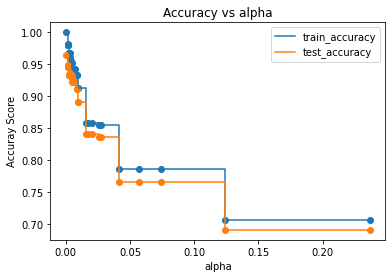

In [179]:
plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.xlabel("alpha")
plt.ylabel("Accuray Score")
plt.show()

# **Conclusion:**<br>
>**Pre-Prune Decision Tree:**<br>
The Pre-Prune Decision Tree has test and train accuracy of approximately 0.958 and 0.997 respectively when it has maximum depth of 10. The total number of nodes are counted to be 113.<br>
It can be observed from the test-train graph shown above that test and train score varies with the change in depth. Typically test score increases with increase in depth but then decreases to become constant. The maximum test score is observed at max_depth= 8.
<br>


>**Original Decision Tree:**<br>
The Original Decision Tree has test and train accuracy of approximately 0.96 and 1.0 respectively.<br>
While it has maximum depth of 11 and total nodes are counted to be 119.

>**Post-Prune Decision Tree:**
<br>The Post-Prune Decision Tree has test and train accuracy of approximately 0.910 and 0.997 respectively when it has alpha= 0.02. The total number of nodes are counted to be 25 while maximum depth is 7.<br>
The model is given different set of values of ccp_alpha using cost complexity pruning and based on that the test-train accuracy graph is plotted.
<br>
It can be observed from the test-train graph shown above that test and train score decreases with the increase in alpha. At the start, the test score decreases with increase in alpha but then decreases to become constant. The maximum test score of approximately 0.964 is observed at ccp_alpha= 0.0017.